<a href="https://colab.research.google.com/github/AWFlister/max-lloyd-algorithm/blob/master/PCD_Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tugas Image Histogram dan Non-uniform Quantization

---

Aryasakti Wirasena | 18/424181/PA/18286


Import modul-modul yang diperlukan dan mount direktori Google Drive ke Google Colab

*   `cv2_imshow()` untuk menampilkan gambar
*   `cv2` sebagai library OpenCV
*   `matplotlib.pyplot` untuk menampilkan histogram
*   `bisect` untuk algoritma bisection yang akan dipakai di ujung program





In [156]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import cv2
import matplotlib.pyplot as plt
import bisect

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load gambar dari Google Drive (sesuaikan dengan akun Google Drive pengakses) dan ubah menjadi Grayscale dengan `cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)`

Akan dibuat juga list `pixelFreq` untuk menyimpan frekuensi kemunculan tiap value piksel

Gambar asli:


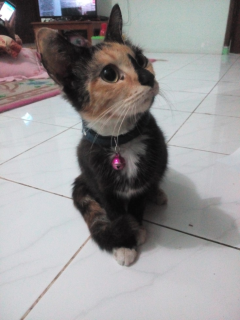

Gambar grayscale:


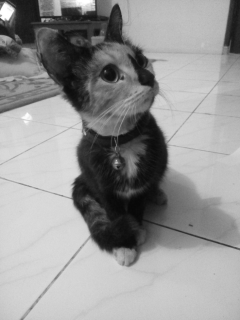

In [157]:
img = cv2.imread('/content/drive/My Drive/kucing.jpg')
dim = (240, 320)
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print('Gambar asli:')
cv2_imshow(img)
print('Gambar grayscale:')
cv2_imshow(grayImg)

pixelFreq = [0] * 256           # List yang menyimpan frekuensi kemunculan piksel dengan value tertentu
for r in range(320):
  for c in range(240):
    pixelFreq[grayImg[r][c]] += 1

grayImg diproses untuk dijadikan histogram frekuensi piksel dengan memasukkan semua value yang ada ke dalam list `histoData`

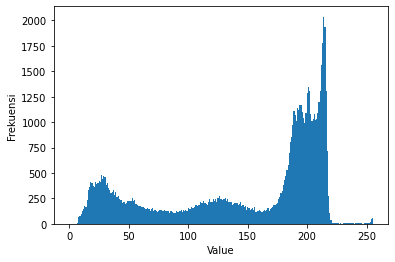

In [158]:
histoData = list()
for r in range(320):
  for c in range(240):
    histoData.append(grayImg[r][c])

plt.hist(histoData, bins = 256, range = (-0.5, 255.5))
plt.xlabel('Value')
plt.ylabel('Frekuensi')
plt.show()

Dari histogram, dapat dilihat bahwa gambar tersebut bersifat heterogen, maka non-uniform quantization bisa dilakukan.

Algoritma Kuantisasi Max-Lloyd (di sini diekspresikan dalam fungsi` quantize()`) menentukan rentang kuantisasi dengan threshold $MSE \le 100$. Merubah nilai threshold berpengaruh pada hasil akhir kuantisasi gambar.

Hasil kuantisasi akan dimasukkan ke list `ranges`, dimana jika `ranges[i] = x `dan `ranges[i + 1] = y`, maka nilai-nilai dalam selang $[x, y)$ mendapatkan nilai $i$.



In [151]:
ranges = list()   # List yang berisi batasan kuantisasi.

def quantize(left, right, threshold):
  global pixelFreq, ranges
  pixelSum = sum(pixelFreq[left : right])
  size = right - left
  mean = pixelSum / size
  squaredError = 0
  for value in pixelFreq[left : right]:
    squaredError += abs(mean - value) ** 2
  mse = squaredError / size
  if(mse > threshold):
    mid = (right + left) // 2
    quantize(left, mid, threshold)
    quantize(mid, right, threshold)
  else:
    ranges.append(left)

quantize(0, 256, 100)   # Nilai gambar grayscale berkisar [0, 256)
print('Banyak level kuantisasi:', len(ranges))


Banyak level kuantisasi: 138


Setelah mendapatkan batasan-batasan dalam ranges, gambar grayImg disesuaikan nilainya dengan non-uniform quantization

Gambar asli : 


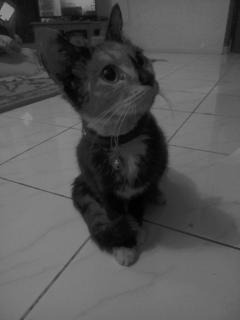

Gambar setelah quantization : 


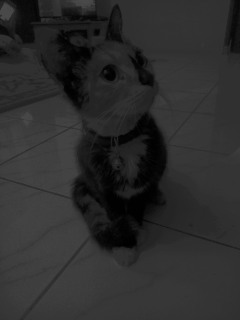

In [155]:
# Jika gambar asli tidak sesuai dengan yang di atas, run ulang modul code kedua
print('Gambar asli : ')
cv2_imshow(grayImg)

newImg = grayImg    # newImg adalah gambar setelah quantization
for r in range(320):
  for c in range(240):
    newImg[r][c] = bisect.bisect(ranges, newImg[r][c])

print('Gambar setelah quantization : ')
cv2_imshow(newImg)